In [3]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
%matplotlib inline

### 4.10.1 plt.axes：手动创建子图

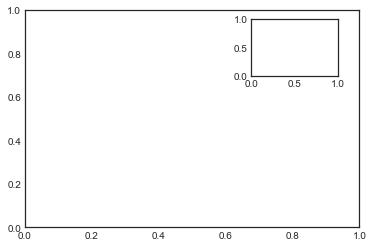

In [6]:
ax1 = plt.axes()  # 默认坐标轴
ax2 = plt.axes([0.65, 0.65, 0.2, 0.2])

fig.add_axes: 相应的面向对象画图接口

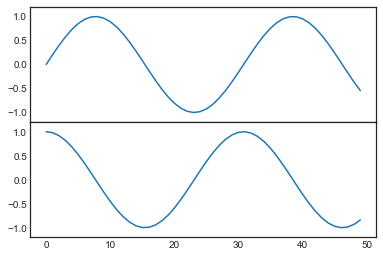

In [7]:
fig = plt.figure()
ax1 = fig.add_axes([0.1, 0.5, 0.8, 0.4],
                   xticklabels=[], ylim=(-1.2, 1.2))
ax2 = fig.add_axes([0.1, 0.1, 0.8, 0.4],
                   ylim=(-1.2, 1.2))

x = np.linspace(0, 10)
ax1.plot(np.sin(x))
ax2.plot(np.cos(x))

### 4.10.2 plt.subplot：简易网格子图

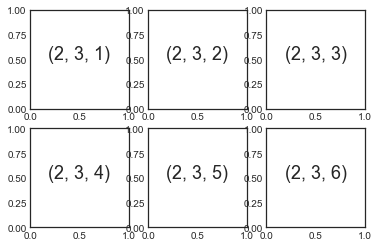

In [8]:
for i in range(1, 7):
    plt.subplot(2, 3, i)
    plt.text(0.5, 0.5, str((2, 3, i)),
            fontsize=18, ha='center')

plt.subplots_adjust：可以调整子图之间的间隔

面向对象接口：fig.add_subplot()可以取得同样的效果

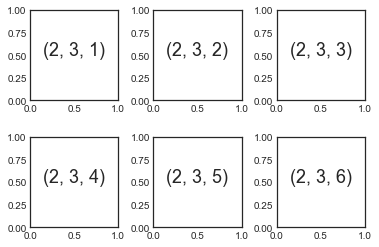

In [10]:
fig = plt.figure()
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i in range(1, 7):
    ax = fig.add_subplot(2, 3, i)
    ax.text(0.5, 0.5, str((2, 3, i)),
           fontsize=18, ha='center')

### 4.10.3 plt.subplots：用一行代码创建网格

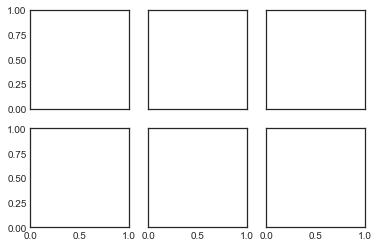

In [12]:
fig, ax = plt.subplots(2, 3, sharex='col', sharey='row')

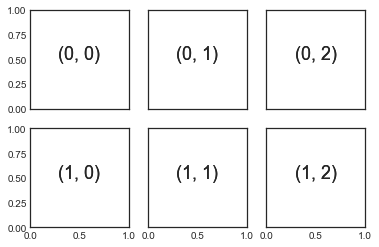

In [14]:
# 坐标轴存放在一个 NumPy 数组中，按照 [row, col] 取值

for i in range(2):
    for j in range(3):
        ax[i, j].text(0.5, 0.5, str((i, j)),
                      fontsize=18, ha='center')
fig

### 4.10.4 plt.GridSpec：实现更复杂的排列方式

plt.GridSpec：实现不规则的多行多列子图网格

In [15]:
grid = plt.GridSpec(2, 3, wspace=0.4, hspace=0.3)

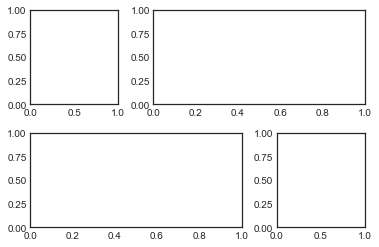

In [21]:
plt.subplot(grid[0, 0])
plt.subplot(grid[0, 1:  ])
plt.subplot(grid[1,  : 2])
plt.subplot(grid[1, 2])

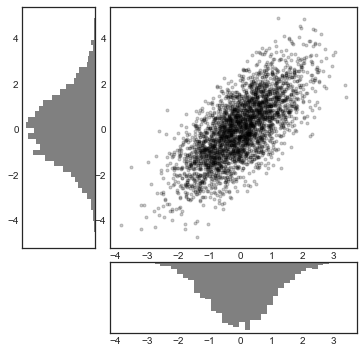

In [28]:
# 创建一些正态分布数据
mean = [0, 0]
cov = [[1, 1], [1, 2]]
x, y = np.random.multivariate_normal(mean, cov, 3000).T

# 设置坐标轴和网格配置方式
fig = plt.figure(figsize=(6, 6))
grid = plt.GridSpec(4, 4, hspace=0.2, wspace=0.2)
main_ax = fig.add_subplot(grid[:-1, 1:])
y_hist = fig.add_subplot(grid[:-1, 0], xticklabels=[], sharey=main_ax)
x_hist = fig.add_subplot(grid[-1, 1:], yticklabels=[], sharex=main_ax)

# 主坐标轴画散点图
main_ax.plot(x, y, 'ok', markersize=3, alpha=0.2)

# 次坐标轴画频次直方图
x_hist.hist(x, 40, histtype='stepfilled',
       orientation='vertical', color='gray')
x_hist.invert_yaxis()

y_hist.hist(y, 40, histtype='stepfilled',
           orientation='horizontal', color='gray')
y_hist.invert_xaxis()